In [40]:
import pandas as pd
import os
import env
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_telco_data
from prepare import prep_telco
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import mannwhitneyu

## Acquire the data

We will use the `get_telco_data()` function from our acquire module to obtain our data.

In [6]:
df = get_telco_data()

We will create a dictionary of our raw data for our `README.md` file.

In [7]:
details = {
    'Target' : ['churn'],
    'Dataype' : [df.dtypes['churn']],
    'Definition' : ['Whether or not a customer has churned'],
}

In [8]:
dictionary = {
    'Feature' : [
                'customer_id', 
                 'gender', 
                 'senior_citizen', 
                 'partner', 
                 'dependents', 
                 'tenure', 
                 'phone_service', 
                 'multiple_lines', 
                 'internet_service_type_id', 
                'online_security', 
                'online_backup', 
                'device_protection',
                'tech_support', 
                'streaming_tv', 
                'streaming_movies', 
                'contract_type_id', 
                'paperless_billing', 
                'payment_type_id', 
                'monthly_charges',
                'total_charges',
                'churn',
                'contract_type',
                'internet_service_type',
                'payment_type',
                ],
    'Dataype' : [
                df.dtypes['customer_id'], 
                 df.dtypes['gender'], 
                 df.dtypes['senior_citizen'],
                df.dtypes['partner'],
                 df.dtypes['dependents'], 
                 df.dtypes['tenure'], 
                 df.dtypes['phone_service'], 
                df.dtypes['multiple_lines'],
                 df.dtypes['internet_service_type_id'], 
                df.dtypes['online_security'], 
                df.dtypes['online_backup'], 
                df.dtypes['device_protection'],
                df.dtypes['tech_support'], 
                df.dtypes['streaming_tv'], 
                df.dtypes['streaming_movies'],
                df.dtypes['contract_type_id'], 
                df.dtypes['paperless_billing'], 
                df.dtypes['payment_type_id'], 
                df.dtypes['monthly_charges'],
                df.dtypes['total_charges'],
                df.dtypes['churn'],
                df.dtypes['contract_type'],
                df.dtypes['internet_service_type'],
                df.dtypes['payment_type'],
                ],
    'Definition' : ['Identification number for customer', 
                    'Customer gender, male or female', 
                    'Yes or no, is the customer a senior citizen', 
                    'Yes or no, does the customer customer has a parter', 
                    'Number of dependents a customer has', 
                    'Number of days a customer has been with the company', 
                    'Type of phone service plan a customer has', 
                    'Yes or no, does the customer have multiple lines', 
                    '1 for DSL, 2 for Fiber Optic, 3 for None', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service',
                    '1 for month-to-month, 2 for year, and 3 for two-year contract', 
                    'Yes or no, whether or not the customer uses paperless billing', 
                    '1 for electronic check, 2 for mailed check, 3 for automatic bank transfer, 4 for automatic credit card payment',
                    'Monthly charges the customer pays',
                    'Total charges the customer has paid',
                    'Yes or no, whether or not the customer has churned',
                    'Month-to-month, year, or two-year contract',
                    'DSL, Fiber Optic, or None',
                    'Electronic check, mailed check, automatic bank transfer, or automatic credit card payment',
                    ],
}

In [9]:
dict_churn = pd.DataFrame(details)

In [10]:
data_dictionary = pd.DataFrame(dictionary)

In [11]:
print(dict_churn.to_markdown(index=False))

| Target   | Dataype   | Definition                            |
|:---------|:----------|:--------------------------------------|
| churn    | object    | Whether or not a customer has churned |


In [12]:
print(data_dictionary.to_markdown(index=False))

| Feature                  | Dataype                           | Definition                                                                                                     |
|:-------------------------|:----------------------------------|:---------------------------------------------------------------------------------------------------------------|
| customer_id              | object                            | Identification number for customer                                                                             |
| gender                   | object                            | Customer gender, male or female                                                                                |
| senior_citizen           | int64                             | Yes or no, is the customer a senior citizen                                                                    |
| partner                  | object                            | Yes or no, does the customer customer has a p

Now we can begin to explore the data. First let's look at the dataframe itself.

In [13]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


We will complete an inital data summarization using `info()`, `describe()`, and `value_counts()`.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [15]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,internet_service_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


The `value_counts()` function will not work if we have duplicate columns, so we have to get rid of duplicate columns.

In [16]:
df = df.loc[:,~df.columns.duplicated()]

Now we can run a loop to determine the `value_counts()` for each column.

In [17]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- customer_id ---
5619-XZZKR    1
3584-WKTTW    1
1338-CECEE    1
3396-DKDEL    1
6260-ONULR    1
             ..
3397-AVTKU    1
2251-PYLPB    1
5155-AZQPB    1
4629-NRXKX    1
5028-HTLJB    1
Name: customer_id, Length: 7043, dtype: int64
---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- senior_citizen ---
0    5901
1    1142
Name: senior_citizen, dtype: int64
---- partner ---
No     3641
Yes    3402
Name: partner, dtype: int64
---- dependents ---
No     4933
Yes    2110
Name: dependents, dtype: int64
---- tenure ---
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
56     80
52     80
64     80
16     80
26     79
25     79
60     76
61     76
65     76
14     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
62   

## Prepare the data

The only missing values in the data are some empty strings in total_charges. We can easily solve this problem by replacing the empty string with the character "0".

In [18]:
df["total_charges"] = df.total_charges.replace(" ", "0")

In [19]:
df['total_charges'] = df.total_charges.astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [21]:
train, test, validate = prep_telco(df)

In [22]:
train

,senior_citizen,tenure,internet_service_type_id,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,partner_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,0,23,3,3,Yes,4,25.60,514.75,No,1,...,1,0,1,0,1,0,1,0,1,0
3338,0,27,2,2,Yes,3,100.50,2673.45,No,0,...,0,0,0,1,0,0,0,1,0,1
4273,1,7,2,1,Yes,1,89.15,574.35,No,0,...,0,0,0,0,0,0,0,1,0,1
2382,0,47,1,1,Yes,3,58.60,2723.40,No,1,...,0,1,0,0,0,0,0,1,0,0
2655,0,41,2,3,Yes,4,99.65,4220.35,No,0,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,0,13,2,1,Yes,4,74.40,896.75,Yes,1,...,0,0,0,0,0,0,0,0,0,0
262,0,33,1,3,No,3,59.55,2016.30,No,1,...,0,0,0,1,0,1,0,1,0,1
3271,0,67,2,2,No,1,104.10,7040.85,Yes,1,...,0,1,0,1,0,0,0,1,0,1
3150,0,69,2,2,Yes,3,105.20,7386.05,No,0,...,0,1,0,0,0,1,0,1,0,1


## Initial Hypothesis Testing

We will add in another column called `has_churned`. This is so that we can run statistical tests on the churn column. We will replace `Yes` and `No` with `1` and `0`. We will drop this column after we run our statistical tests.

In [60]:
train['has_churned'] = train['churn'].replace({'No' : 0, 'Yes': 1})

For all of the following hypotheses we will set $\alpha = 0.05 $. 

### Hypothesis 1

**Formulate hypotheses**

$H_0$: There is no difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-year contracts. 

$H_a$: There is a significant difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-yera contracts. 

**Get data**

In [33]:
month_to_month_customers = train[train.contract_type_id == 1]

In [34]:
year_and_two_year_customers = train[train.contract_type_id != 1]

**Compute p value and test statistic**

In [35]:
tstat, p = stats.ttest_ind(month_to_month_customers.has_churned, year_and_two_year_customers.has_churned)

In [36]:
tstat

28.150653344431294

In [37]:
p

4.950197678770975e-159

**Make a conclusion based on our data**

Since our p value is less than 0.05, we can conclude that there is a significant difference between the month-to-month customer churn rate and the year-to-year and two-year customer churn rates. 

**Chart indicating correlation**

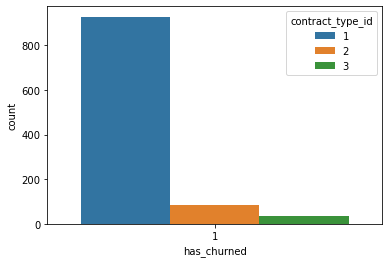

In [76]:
churn_counts_by_contract = sns.countplot(x='has_churned', data=train[train.has_churned == 1], hue = "contract_type_id")

### Hypothesis 2

**Formulate hypotheses**

$H_0$: There is no correlation between customer churn rate and monthly charges. 

$H_a$: There is a correlation between customer churn rate and monthly charges.

**Get data**

In [38]:
churn_rate = df.has_churned
monthly_charges = df.monthly_charges

**Compute p value and correlation**

In [39]:
corr, p = stats.pearsonr(churn_rate, monthly_charges)
corr, p

(0.19335642223784708, 2.7066456068899293e-60)

**Make conclusion based on our data**

Our p-value is less than 0.05. We reject the null hypothesis and conclude that churn rate and monthly charges are correlated.

**Chart indicating correlation**

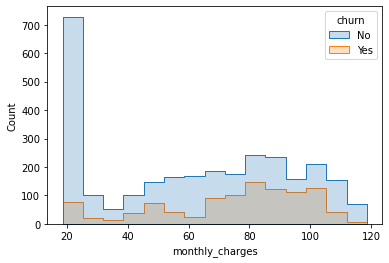

In [99]:
churn_by_monthly_charges = sns.histplot(
    x=train.monthly_charges, hue=train.churn, element = 'step'
)

We will now use the Mann Whitney Test to test if the churn group has a different mean than the non churn group for certain values. We no longer need the `has_churned` column, so we will drop it. 

In [88]:
train = train.drop("has_churned", axis = 1)

**We need the following data for our next hypotheses**

In [89]:
train_has_churned = train[train.churn == 'Yes']

In [90]:
train_no_churn = train[train.churn == 'No']

### Hypothesis 3

**Formulate hypotheses**

$H_0$: There is no significant difference between the mean tenure for customers who didn't churn and customers who did churn. 

$H_a$: There is a significant difference between the mean tenure for customers who churned and customers who did churn. 

**Compute statistic and p value**

In [43]:
stats.mannwhitneyu(train_has_churned['tenure'], train_no_churn['tenure'], use_continuity=True)

MannwhitneyuResult(statistic=787745.5, pvalue=5.978994288055496e-118)

Because our p value is less than 0.05, we conclude that the mean tenure for customers who churned is signficantly different from the mean tenure for customers who didn't churn. 

**Graph**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

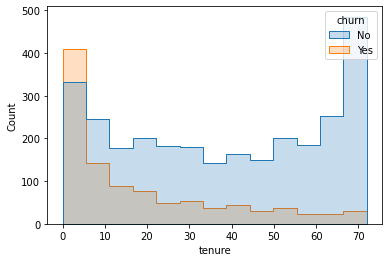

In [96]:
sns.histplot(x=train.tenure, hue=train.churn, element = 'step')

### Hypothesis 4

**Formulate hypotheses**

$H_0$: There is no significant difference in mean monthly charges for customers who have churned and customers who have not churned. 

$H_a$: There is a significant difference in mean monthly charges for customers who have churned and customers who have not churned.

**Compute statistic and p value**

In [50]:
stats.mannwhitneyu(train_has_churned['monthly_charges'], train_no_churn['monthly_charges'], use_continuity=True)

MannwhitneyuResult(statistic=1160715.0, pvalue=1.4455529063493655e-29)

Because our p value is less than 0.05, we reject the null hypothesis and conclude that mean monthly charges for customers who have churned are significantly different from mean monthly charges for customers who have not churned.

**Graph**

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

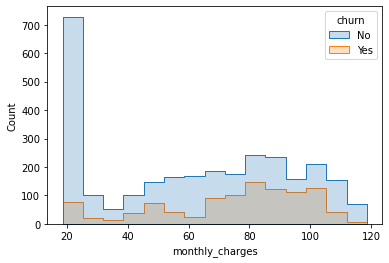

In [97]:
sns.histplot(x=train.monthly_charges, hue = train.churn, element = 'step')

### Hypothesis 5

**Formulate hypotheses**

$H_0$: There is no significant difference in average contract type for customers who churn and customers who do not churn. 

$H_a$: There is a significant difference in average contract type for customers who churn and customers who do not churn.

**Compute statistic and p value**

In [51]:
stats.mannwhitneyu(train_has_churned['contract_type_id'], train_no_churn['contract_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=789116.0, pvalue=3.760387895572131e-144)

Because our p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in mean contract type for customers who churn and customers who don't churn. 

### Hypothesis 6

**Formulate hypotheses**

$H_0$: There is no significant difference in mean payment type id for customers who churn and customers who don't churn.

$H_a$: There is a significant difference in mean payment type id for customers who churn and customers who don't churn.

**Calculate statistic and p value**

In [52]:
stats.mannwhitneyu(train_has_churned['payment_type_id'], train_no_churn['payment_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1010432.5, pvalue=4.42203203035722e-62)

Because or p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant different in mean payment type id for customers who churned and customers who did not churn. 

### Hypothesis 7

**Formulate hypotheses**

$H_0$: There is no significant difference in the mean internet service type id for customers who churn and customers who did not churn. 

$H_a$: There is a significant difference in the mean internet service type id for customers who churn and customers who did not churn. 

**Calculate statistic and p value**

In [53]:
stats.mannwhitneyu(train_has_churned['internet_service_type_id'], train_no_churn['internet_service_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1469861.5, pvalue=0.061278792735769076)

Because our p value is greater than 0.05, we fail to reject the null hypothesis that mean internet service type id is not significantly different for customers who churn and customers who don't churn.

## Split the data

In [36]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [37]:
train, validate, test = train_validate_test_split(df, target='churn')
train.head(2)

,senior_citizen,tenure,internet_service_type_id,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,partner_Yes,...,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,has_churned
5642,0,23,3,3,Yes,4,25.6,514.75,No,1,...,0,1,0,1,0,1,0,1,0,0
3338,0,27,2,2,Yes,3,100.5,2673.45,No,0,...,0,0,1,0,0,0,1,0,1,0


In [38]:
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

In [39]:
X_train, y_train = train.drop(columns='churn'), train.churn
X_validate, y_validate = validate.drop(columns='churn'), validate.churn
X_test, y_test = test.drop(columns='churn'), test.churn

In [40]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,partner_Yes,dependents_Yes,...,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,has_churned
5642,0,23,3,3,Yes,4,25.60,514.75,1,1,...,0,1,0,1,0,1,0,1,0,0
3338,0,27,2,2,Yes,3,100.50,2673.45,0,0,...,0,0,1,0,0,0,1,0,1,0
4273,1,7,2,1,Yes,1,89.15,574.35,0,0,...,0,0,0,0,0,0,1,0,1,0
2382,0,47,1,1,Yes,3,58.60,2723.4,1,0,...,1,0,0,0,0,0,1,0,0,0
2655,0,41,2,3,Yes,4,99.65,4220.35,0,0,...,1,0,0,0,1,0,1,0,1,0


In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3943 non-null   object 
 1   gender                    3943 non-null   object 
 2   senior_citizen            3943 non-null   int64  
 3   partner                   3943 non-null   object 
 4   dependents                3943 non-null   object 
 5   tenure                    3943 non-null   int64  
 6   phone_service             3943 non-null   object 
 7   multiple_lines            3943 non-null   object 
 8   internet_service_type_id  3943 non-null   int64  
 9   online_security           3943 non-null   object 
 10  online_backup             3943 non-null   object 
 11  device_protection         3943 non-null   object 
 12  tech_support              3943 non-null   object 
 13  streaming_tv              3943 non-null   object 
 14  strea

## Clean the data

In [94]:
dummy_df = pd.get_dummies(X_train[['partner', 'dependents', 'gender', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], drop_first=True)
X_train = pd.concat([X_train, dummy_df], axis=1)

In [95]:
X_train = X_train.drop(columns = ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'])

In [96]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,partner_Yes,dependents_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,0,23,3,3,Yes,4,25.60,514.75,1,1,...,1,0,1,0,1,0,1,0,1,0
3338,0,27,2,2,Yes,3,100.50,2673.45,0,0,...,0,0,0,1,0,0,0,1,0,1
4273,1,7,2,1,Yes,1,89.15,574.35,0,0,...,0,0,0,0,0,0,0,1,0,1
2382,0,47,1,1,Yes,3,58.60,2723.4,1,0,...,0,1,0,0,0,0,0,1,0,0
2655,0,41,2,3,Yes,4,99.65,4220.35,0,0,...,0,1,0,0,0,1,0,1,0,1


In [97]:
X_train = X_train.drop(columns = ['paperless_billing', 'total_charges'])

In [98]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,partner_Yes,dependents_Yes,gender_Male,phone_service_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,0,23,3,3,4,25.60,1,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3338,0,27,2,2,3,100.50,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
4273,1,7,2,1,1,89.15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2382,0,47,1,1,3,58.60,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2655,0,41,2,3,4,99.65,0,0,1,1,...,0,1,0,0,0,1,0,1,0,1


## Baseline Accuracy

In [99]:
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

The majority of our customers have not churned, so our baseliene assumption is that cutsomers will not churn.

In [100]:
model = DummyClassifier(strategy= 'constant', constant ='No')

In [101]:
model.fit(X_train, y_train)

DummyClassifier(constant='No', strategy='constant')

In [102]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


## Decision Tree

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import graphviz
from graphviz import Graph
from sklearn import tree
import numpy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [104]:
clf1 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [105]:
clf1 = clf1.fit(X_train, y_train)

In [106]:
clf1

DecisionTreeClassifier(max_depth=5, random_state=123)

In [109]:
dot_data = export_graphviz(clf1, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree', view=True)

'telco_tree.pdf'

The tree indicates to us that the main predictor of churn is contract type. Customers with contract type ID 1 are more likely to churn than customers with contract type ID 2 and 3.

Of customers who have contract type iD one, the biggest predictor of churn is monthly charges less than 64.43.

3 is a year contract, 2 is yearly, 1 is month to month

### Probability of churn

In [41]:
y_pred = clf1.predict(X_train)

In [42]:
y_pred_proba = clf1.predict_proba(X_train)

In [43]:
y_probability = pd.DataFrame(y_pred_proba)
y_probability.head()

,0,1
0,0.983193,0.016807
1,0.876190,0.123810
2,0.404908,0.595092
3,0.812500,0.187500
4,0.876190,0.123810


### Evaluate in-sample results

#### Accuracy score

In [44]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


#### Confusion Matrix

In [45]:
confusion_matrix(y_train, y_pred)

array([[2784,  113],
       [ 709,  337]])

In [46]:
labels1 = ['no_churn_actual', 'churn_actual']
labels2 = ['no_churn_predicted', 'churn_predicted']

pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels1, columns = labels2)

,no_churn_predicted,churn_predicted
no_churn_actual,2784,113
churn_actual,709,337


### Classification Report

In [47]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T

In [48]:
classification_report_churn

,precision,recall,f1-score,support
No,0.797023,0.960994,0.871362,2897.000000
Yes,0.748889,0.322180,0.450535,1046.000000
accuracy,0.791529,0.791529,0.791529,0.791529
macro avg,0.772956,0.641587,0.660948,3943.000000
weighted avg,0.784254,0.791529,0.759724,3943.000000


## Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

### Fit the model

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

### Feature importance

In [52]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = [ "relative importance"])

In [53]:
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)

In [54]:
feature_importances.columns.names = ['category']

In [55]:
feature_importances

category,relative importance
tenure,0.241970
monthly_charges,0.156533
contract_type_id,0.148934
payment_type_id,0.080547
internet_service_type_id,0.043483
tech_support_Yes,0.040455
online_security_Yes,0.036775
gender_Male,0.023522
online_backup_Yes,0.022281
senior_citizen,0.020345


In [66]:
most_important_features = feature_importances.head(3)

In [67]:
print(most_important_features.to_markdown())

|                  |   relative importance |
|:-----------------|----------------------:|
| tenure           |              0.24197  |
| monthly_charges  |              0.156533 |
| contract_type_id |              0.148934 |


The above chart indicates to us that the most important values for predicting churn are: **tenure**, **monthly charges**, **contract type**, and **payment type**.

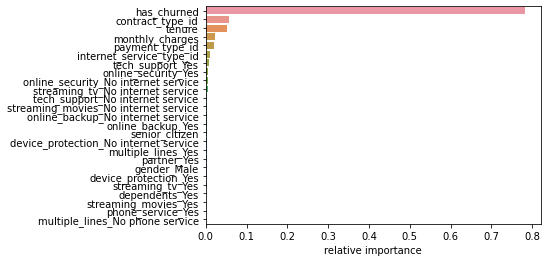

In [62]:
relative_importances = sns.barplot(x=feature_importances['relative importance'], y=feature_importances.index)

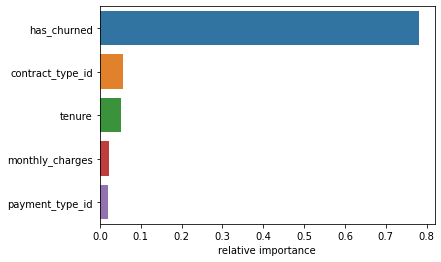

In [63]:
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:5], y=feature_importances.index[0:5])

### Make predictions

In [71]:
y_pred = rf.predict(X_train)

In [72]:
pd.DataFrame(y_pred)

,0
0,No
1,No
2,No
3,No
4,No
...,...
3938,Yes
3939,No
3940,Yes
3941,No


### Estimate probability

In [58]:
y_pred_proba = rf.predict_proba(X_train)

In [59]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.987037,0.012963
1,0.821021,0.178979
2,0.444101,0.555899
3,0.869228,0.130772
4,0.886389,0.113611
...,...,...
3938,0.505858,0.494142
3939,0.981048,0.018952
3940,0.638087,0.361913
3941,0.833498,0.166502


#### Accuracy

In [60]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.89


#### Confusion matrix

In [61]:
labels1 = ['did not churn actual', 'churned actual']
labels2 = ['did not churn predicted', 'churned predicted']
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels1, columns=labels2)

In [62]:
df_confusion_matrix

,did not churn predicted,churned predicted
did not churn actual,2784,113
churned actual,709,337


#### Classification Report

In [63]:
classification_report_2 = classification_report(y_train, y_pred, output_dict = True)

In [64]:
df_classification_report_2 = pd.DataFrame(classification_report_2).T

In [65]:
df_classification_report_2

,precision,recall,f1-score,support
No,0.797023,0.960994,0.871362,2897.000000
Yes,0.748889,0.322180,0.450535,1046.000000
accuracy,0.791529,0.791529,0.791529,0.791529
macro avg,0.772956,0.641587,0.660948,3943.000000
weighted avg,0.784254,0.791529,0.759724,3943.000000
